In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**There are missing values in waterfront, view, yr_renovated.**

In [4]:
#convert date
df['date'] = pd.to_datetime(df['date'])
df['date'].max(), df['date'].min()

(Timestamp('2015-05-27 00:00:00'), Timestamp('2014-05-02 00:00:00'))

Assumption: since the data is one year old, we ignore house appreciation in price.

In [5]:
#create year column
df['year_sold'] = pd.DatetimeIndex(df['date']).year

In [6]:
df.drop('date', axis=1, inplace=True)

# Deal with missing data

Assumption: we assume that missing data in renovated year means the house has been renovated. we also assume that missing data in waterfront means that the house doesn't have  waterfront view

In [7]:
df['yr_renovated'].fillna(value=0.0, inplace=True)
df['waterfront'].fillna(value=0.0, inplace=True)

There are 63 houses missing 'view' values. 

One of them has a waterfront. So, we replace NaN of this one with 4.0 which is 

In [8]:
view_missing = df[df['view'].isna()].sort_values('price', ascending=False)

In [9]:
view_missing[view_missing['waterfront'] ==1]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
1313,7558700030,5300000.0,6,6.0,7390,24829,2.0,1.0,NaN,4,12,5000,2390.0,1991,0.0,98040,47.5631,-122.21,4320,24619,2015


In [10]:
df.loc[df['id'] == 7558700030, 'view'] = 4.0

In [11]:
round(df[df['waterfront']==1]['view'].mean())

4.0

In [12]:
round(df[df['waterfront']==0]['view'].mean())

0.0

In [13]:
df['view'].fillna(value=0.0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [15]:
df['house_age'] = df['year_sold'] - df['yr_built']

In [16]:
df['reno'] = np.where(df['yr_renovated'] != 0, 1, 0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

# Potential Outliers

In [18]:
cleaning_df = df.drop(['yr_built', 'yr_renovated'], axis=1)

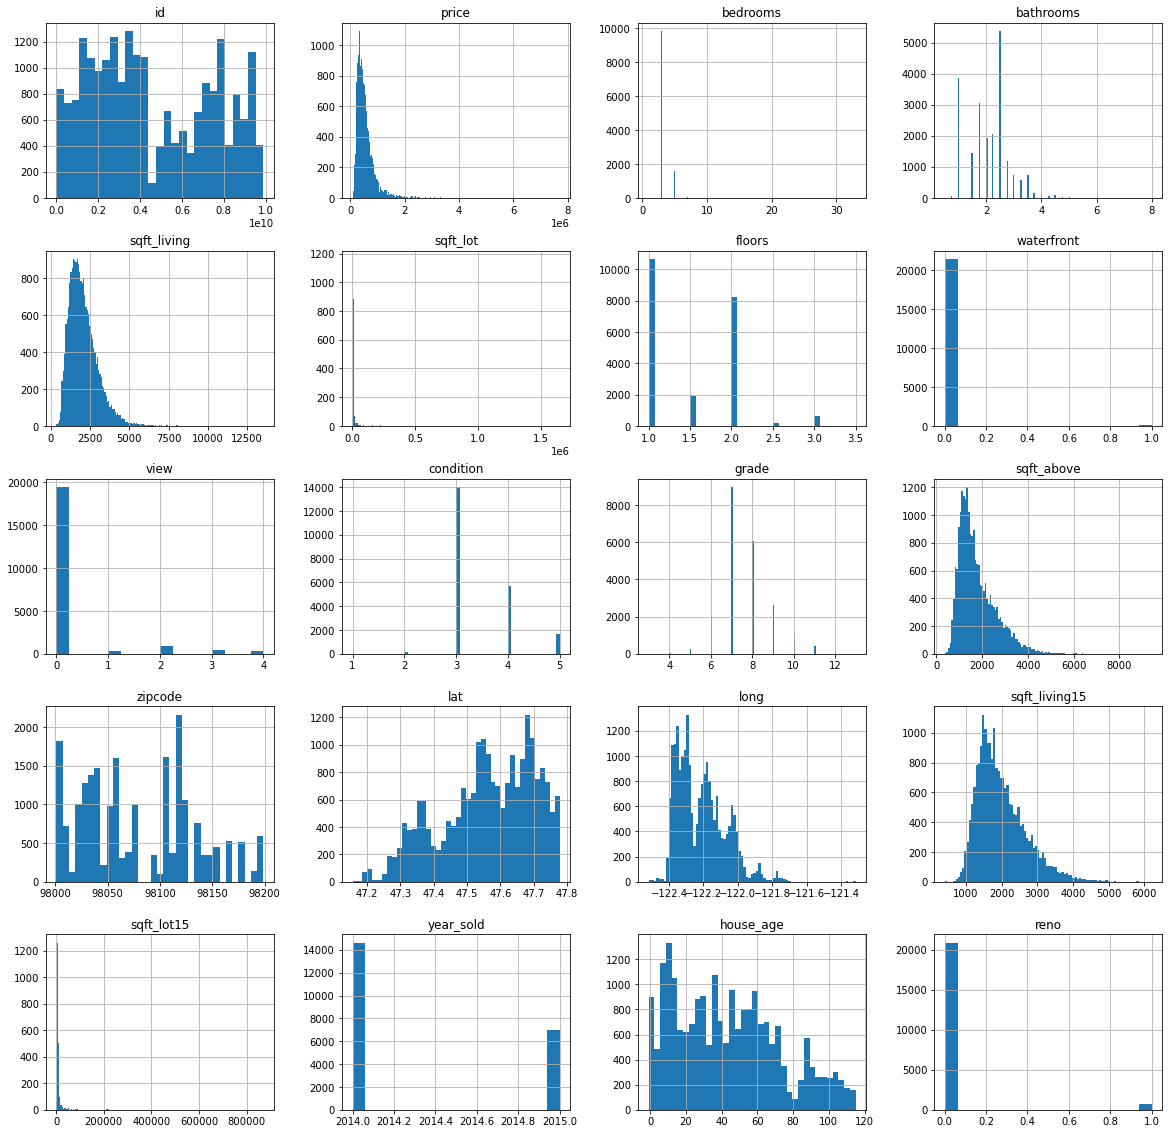

In [19]:
cleaning_df.hist(figsize=(20,20), bins='auto');

# Duplicate Data

In [20]:
cleaning_df[cleaning_df.duplicated(subset=['lat','long'], keep=False)].sort_values('lat')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
20909,8141310040,246950.0,3,3.00,1670,4440,1.0,0.0,0.0,3,7,1670,0.0,98022,47.1948,-121.975,1670,4622,2014,0,0
20670,8141310030,256703.0,3,2.00,1670,4441,1.0,0.0,0.0,3,7,1670,0.0,98022,47.1948,-121.975,1670,4622,2014,0,0
16521,5595900345,460000.0,4,2.75,3460,13168,2.0,0.0,0.0,4,8,3460,0.0,98022,47.2046,-121.996,1500,7670,2015,83,1
5142,5595900280,235000.0,3,1.00,1050,7670,1.5,0.0,0.0,5,7,1050,0.0,98022,47.2046,-121.996,1220,7670,2015,60,0
8422,9432900180,307999.0,4,2.75,2420,8438,2.0,0.0,0.0,3,8,2420,0.0,98022,47.2091,-122.009,2420,8580,2014,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19286,7418700040,234000.0,3,1.00,960,9624,1.0,0.0,0.0,3,7,960,0.0,98155,47.7758,-122.301,1540,9624,2015,62,0
10526,253600160,384950.0,3,2.50,1860,3690,2.0,0.0,0.0,3,7,1860,0.0,98028,47.7760,-122.239,1870,4394,2014,14,0
7525,253600150,380000.0,2,2.50,1860,3504,2.0,0.0,0.0,3,7,1860,0.0,98028,47.7760,-122.239,1860,4246,2014,14,0
8522,293720180,415000.0,3,2.50,1980,4274,2.0,0.0,0.0,3,7,1980,0.0,98028,47.7767,-122.239,2000,4394,2014,11,0


In [21]:
cleaning_df[cleaning_df.duplicated() == True]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
3947,1825069031,550000.0,4,1.75,2410,8447,2.0,0.0,3.0,4,8,2060,350.0,98074,47.6499,-122.088,2520,14789,2014,78,1
20038,8648900110,555000.0,3,2.50,1940,3211,2.0,0.0,0.0,3,8,1940,0.0,98027,47.5644,-122.093,1880,3078,2014,5,0


After check out these rows, I don't feel that they are identical. 

In [22]:
zipoutliers = cleaning_df.groupby('zipcode')['price'].describe()
zipoutliers 

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98001,361.0,2.811949e+05,98837.430520,100000.0,215000.0,260000.0,320000.0,850000.0
98002,199.0,2.342840e+05,52041.448659,95000.0,199975.0,235000.0,268500.0,389000.0
98003,280.0,2.941113e+05,107597.662236,128000.0,229000.0,267475.0,330000.0,950000.0
98004,317.0,1.356524e+06,746094.067159,425000.0,845000.0,1150000.0,1690000.0,7060000.0
98005,168.0,8.102897e+05,268979.168276,400000.0,637775.0,765475.0,911250.0,1960000.0
...,...,...,...,...,...,...,...,...
98177,255.0,6.764194e+05,436379.739508,245560.0,428500.0,554000.0,739475.0,3800000.0
98178,262.0,3.106128e+05,161044.746227,90000.0,223250.0,278277.0,349792.5,1700000.0
98188,136.0,2.890783e+05,103106.579944,110000.0,228750.0,264000.0,335000.0,707000.0


In [23]:
cleaning_df['sqft_basement'].value_counts().index

Index(['0.0', '?', '600.0', '500.0', '700.0', '800.0', '400.0', '1000.0',
       '900.0', '300.0',
       ...
       '861.0', '1852.0', '792.0', '666.0', '1024.0', '1960.0', '2500.0',
       '172.0', '2310.0', '207.0'],
      dtype='object', length=304)

In [24]:
cleaning_df['sqft_basement'].replace('?', '0.0',inplace=True)

In [25]:
cleaning_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1798.0        1
2390.0        1
143.0         1
2580.0        1
2610.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [26]:
cleaning_df['sqft_basement'] = cleaning_df['sqft_basement'].apply(lambda x: int(x[:-2]))

In [27]:
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  year_s

In [28]:
cleaning_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233366,3.409825,7.657915,1788.596842,285.716581,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,43.323286,0.034449
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765100,0.650546,1.173200,827.759761,439.819830,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,29.377285,0.182384
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,-1.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,18.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,40.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,63.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000,1.000000


In [29]:
cleaning_df.price = cleaning_df.price.astype(np.int64)

# Visualization

Text(0.5, 1.0, 'Pearson Correlation Matrix')

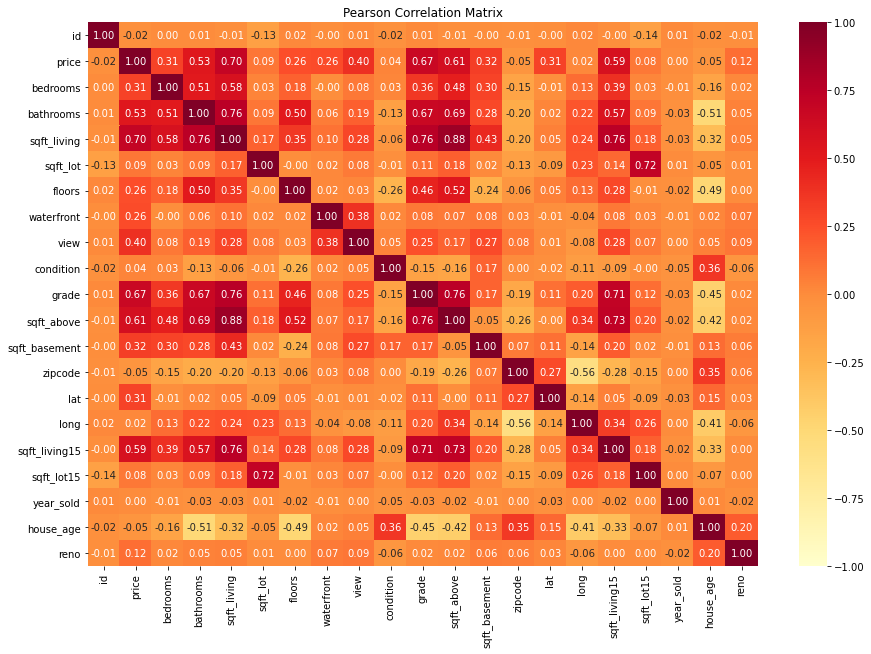

In [36]:
import seaborn as sns

corr = cleaning_df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, cmap='YlOrRd', annot=True, center=0, fmt=".2f", vmin=-1, vmax=1)

ax.set_title("Pearson Correlation Matrix")

In [31]:
corr_list = cleaning_df.corr()['price'].sort_values(ascending=False)
corr_list

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.396413
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
reno             0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
long             0.022036
year_sold        0.003727
id              -0.016772
zipcode         -0.053402
house_age       -0.053890
Name: price, dtype: float64

In [32]:
zip_price = cleaning_df[['price', 'zipcode']]
zipcode = zip_price['zipcode'].unique()

C:\Users\ramil\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ramil\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ramil\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

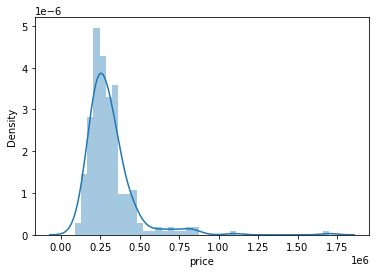

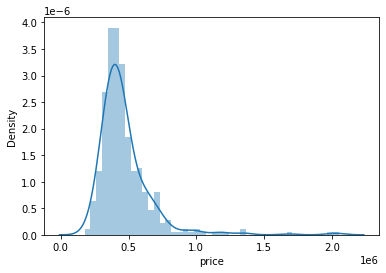

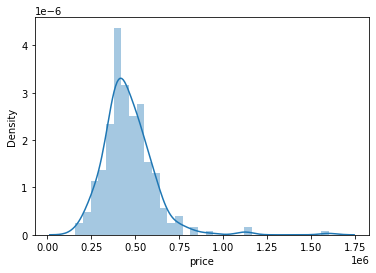

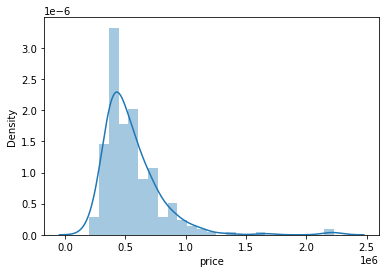

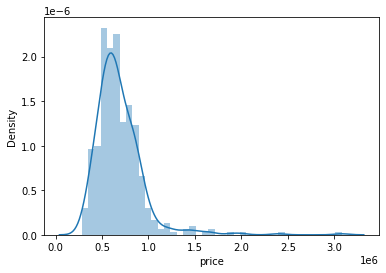

In [33]:
for i in zipcode[:5]:
    fig, ax = plt.subplots()
    ax = sns.distplot(zip_price[zip_price['zipcode'] == i]['price'])

# Outliers 

In [41]:
wdf = cleaning_df[cleaning_df['price']<4000000]

C:\Users\ramil\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


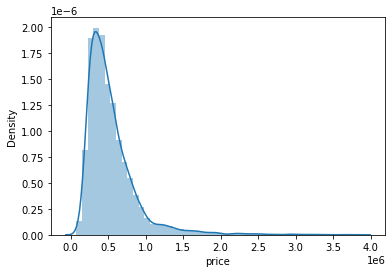

In [42]:
fig, ax = plt.subplots()
ax = sns.distplot(wdf['price'])

In [40]:
cleaning_df[cleaning_df['grade']<=5]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
36,9435300030,550000,4,1.00,1660,34848,1.0,0.0,0.0,1,5,930,730,98052,47.6621,-122.132,2160,11467,2014,81,0
166,2009000370,269950,2,1.75,1340,7250,1.0,0.0,0.0,5,5,700,640,98198,47.4080,-122.327,1830,9750,2015,66,0
263,1400300055,425000,2,1.00,770,5040,1.0,0.0,0.0,3,5,770,0,98144,47.5964,-122.299,1330,2580,2015,85,0
264,2123039032,369900,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0,98070,47.4683,-122.438,1230,14267,2014,78,0
350,7325600160,299000,1,0.75,560,12120,1.0,0.0,0.0,3,4,560,0,98014,47.6750,-121.854,1300,19207,2014,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19140,7227800040,190000,5,2.00,1750,10284,1.0,0.0,0.0,4,5,1750,0,98056,47.5094,-122.182,1560,9010,2014,71,0
19270,844001145,208500,2,1.00,880,4814,1.0,0.0,0.0,4,5,880,0,98010,47.3107,-121.999,1010,6160,2015,109,0
19329,2114700090,151000,2,0.75,720,5040,1.0,0.0,0.0,3,4,720,0,98106,47.5323,-122.347,1290,4120,2015,66,0
19423,8127700845,375000,2,1.00,710,4618,1.0,0.0,1.0,3,5,710,0,98199,47.6400,-122.394,1810,4988,2015,90,0
